# Exploratory Data Analysis of a Video Games Sales Dataset

> Author: Diogo Silva
>
> Date: 24 November 2023

<br>

<a href="https://colab.research.google.com/github/diogo-costa-silva/eda-python-projects/blob/main/New%20York%20City%20Airbnb%20Data/NYC_Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this analysis, we scrutinized the "New York City Airbnb Open Data" through Python's advanced data analysis tools including pandas, numpy, matplotlib, and seaborn. The exploration aimed at decoding the dataset's core traits and unearthing key insights.

Beginning with an in-depth data exploration, we tackled varied statistical metrics and constructed charts to unveil patterns and connections among the dataset's elements. Key investigations included analyzing how prices interact with user reviews, their correlation with listing availability, and the impact of required minimum stays on pricing.

Our approach was meticulous and transparent, ensuring each graph and its implications were clearly explained. The coding was structured to be both strong and flexible, to allow for future analyses to be conducted with ease.

We suggest reviewing this notebook to understand the strategic framework and insights derived. This investigation sheds light on the intricacies of New York's Airbnb market.

The Dataset can be found in [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data).

## 0. Importing Libraries & Downloading and Loading the Dataset

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%pip install opendatasets kaggle -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/gregorut/videogamesales'

#od.download(dataset_url)

In [4]:
games = pd.read_csv("./videogamesales/vgsales.csv")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
games2 = pd.read_csv("./videogamesales/vgsales.csv", index_col = "Name")
games2.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


---
## 1. Data Understanding

Let's do an initial check on the dataset.

### 1.1. Let's check the shape of the dataset

In [6]:
games.shape

(16598, 11)

### 1.2. Extracting the Column Names

In [7]:
# Extracting the Column Names
list(games.columns)

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

### 1.3. Let’s select the game "Super Mario Bros"

In [9]:
games.loc[games['Name'] == 'Super Mario Bros.']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
200,201,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


### 1.4. Let's sort the games by year

In [11]:
games.sort_values(by = "Year").head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [12]:
games.sort_values(by = "Year", ascending = False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.0,0.14,0.00,0.17


In [13]:
games.sort_values(by = ["Year","Genre"]).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27


### 1.5. Let’s see the rows whose genre is action

In [16]:
games[games["Genre"] == "Action"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [17]:
games_by_genre = games["Genre"] == "Action"

In [18]:
games[games_by_genre].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [19]:
games_in_2010 = games["Year"] == 2010

In [20]:
games[games_by_genre & games_in_2010]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
123,124,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
134,135,Red Dead Redemption,X360,2010.0,Action,Take-Two Interactive,3.70,1.97,0.09,0.57,6.34
216,217,God of War III,PS3,2010.0,Action,Sony Computer Entertainment,2.74,1.36,0.12,0.63,4.84
373,374,Assassin's Creed: Brotherhood,X360,2010.0,Action,Ubisoft,2.84,0.39,0.03,0.24,3.50
514,515,Assassin's Creed: Brotherhood,PS3,2010.0,Action,Ubisoft,1.87,0.57,0.11,0.30,2.84
...,...,...,...,...,...,...,...,...,...,...,...
15718,15721,Marvel Superheroes 3D: Grandmaster's Challenge,Wii,2010.0,Action,Neko Entertainment,0.00,0.01,0.00,0.00,0.02
15768,15771,Metal Fight Beyblade: Choujou Kessen! Big Bang...,DS,2010.0,Action,Hudson Soft,0.00,0.00,0.02,0.00,0.02
15789,15792,Dark Void,PC,2010.0,Action,Capcom,0.00,0.01,0.00,0.00,0.02
15868,15871,Shin Sangoku Musou Online: Souten Ranbu,PS3,2010.0,Action,Tecmo Koei,0.00,0.00,0.02,0.00,0.02


In [21]:
games[games_by_genre | games_in_2010]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
...,...,...,...,...,...,...,...,...,...,...,...
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


### 1.6. let’s take a look at the games made after 2015

In [22]:
after_2015 = games["Year"] > 2015

In [23]:
games[after_2015]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
...,...,...,...,...,...,...,...,...,...,...,...
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [24]:
mid_2000s = games["Year"].between(2000, 2010)

In [25]:
games[mid_2000s]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### 1.7. Let’s see the game names that include sport word

In [28]:
sport_in_title = games['Name'].str.lower().str.contains("sport")

In [29]:
games[sport_in_title]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
139,140,Kinect Sports,X360,2010.0,Sports,Microsoft Game Studios,3.92,1.78,0.03,0.51,6.24
160,161,Forza Motorsport 3,X360,2009.0,Racing,Microsoft Game Studios,2.99,1.92,0.10,0.51,5.51
228,229,Forza Motorsport 4,X360,2011.0,Racing,Microsoft Game Studios,2.08,2.04,0.06,0.47,4.64
...,...,...,...,...,...,...,...,...,...,...,...
15661,15664,Disney Sports Football,GC,2002.0,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.02
15820,15823,Winter Sports 3: The Great Tournament,X360,2010.0,Sports,Tradewest,0.00,0.01,0.00,0.00,0.02
15954,15957,IHRA Drag Racing: Sportsman Edition,XB,2006.0,Racing,Bethesda Softworks,0.01,0.00,0.00,0.00,0.02
16325,16328,RalliSport Challenge(JP sales),XB,2002.0,Racing,Microsoft Game Studios,0.00,0.00,0.01,0.00,0.01


### 1.8. Let’s group by Genre column

In [30]:
genres = games.groupby("Genre")

In [31]:
genres["Global_Sales"].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [32]:
genres["Global_Sales"].sum().sort_values(ascending = False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

In [36]:
games_avg=games["Global_Sales"].groupby(games["Genre"]).mean()
games_avg

Genre
Action          0.528100
Adventure       0.185879
Fighting        0.529375
Misc            0.465762
Platform        0.938341
Puzzle          0.420876
Racing          0.586101
Role-Playing    0.623233
Shooter         0.791885
Simulation      0.452364
Sports          0.567319
Strategy        0.257151
Name: Global_Sales, dtype: float64

## 2. Data Visualization

In [33]:
sns.set(style = 'whitegrid')
sns.set(rc={'figure.figsize':(12,9)})

### 2.1. Box plot for the Year column

<Axes: >

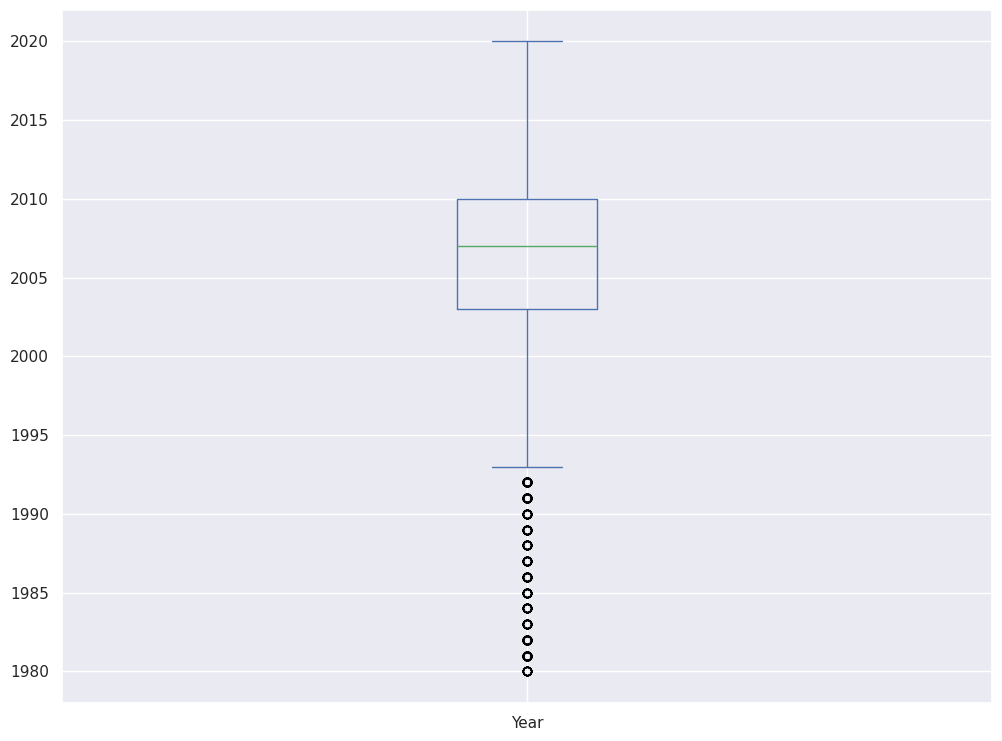

In [34]:
games["Year"].plot.box()

### 2.2. Histogram for the Year column

<Axes: >

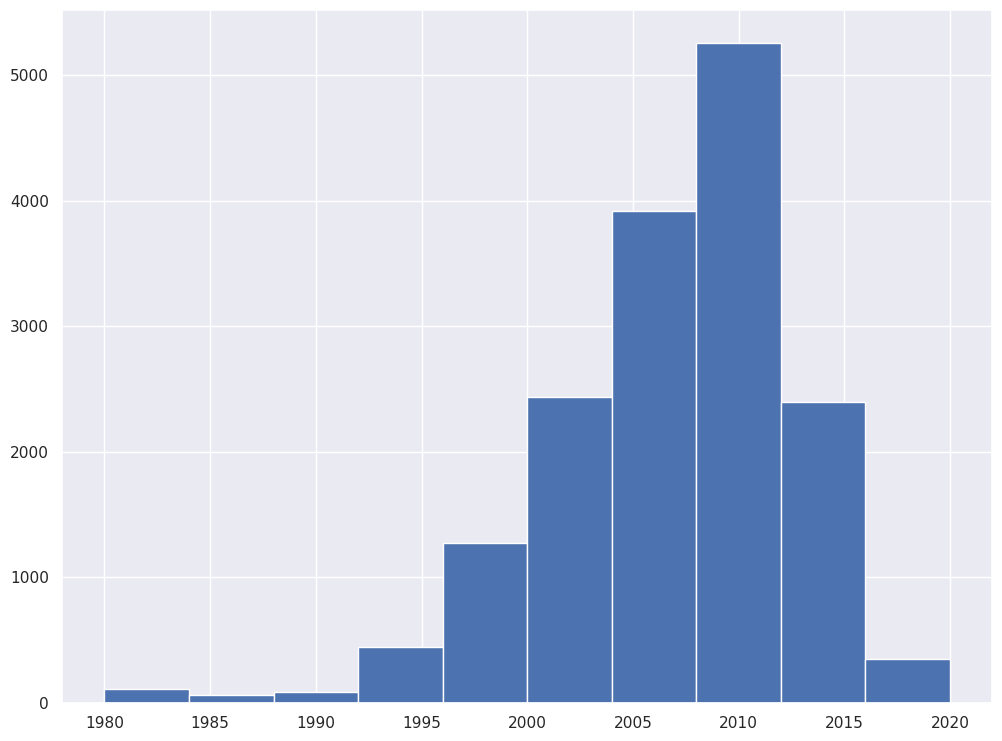

In [35]:
games["Year"].hist()

### 2.3. Pie plot for the global sales

<Axes: ylabel='Global_Sales'>

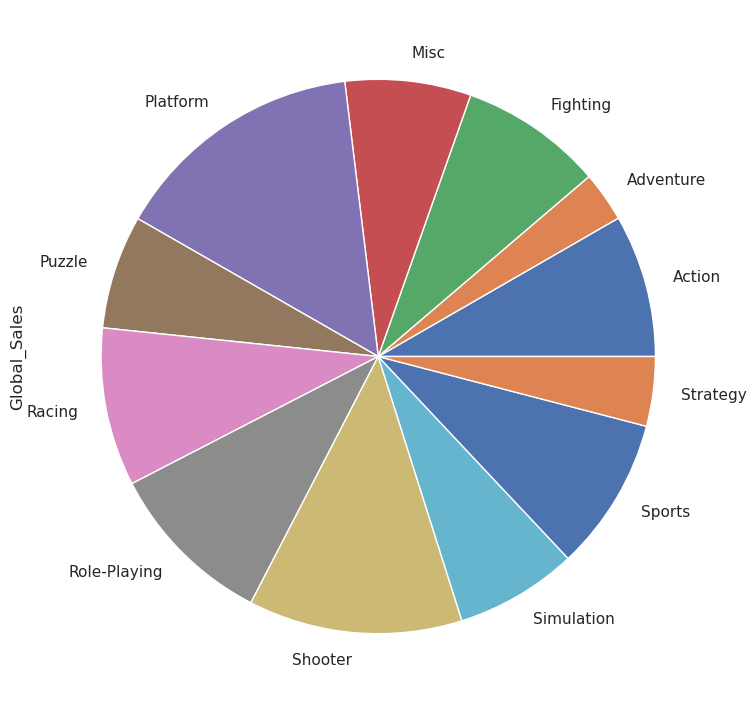

In [37]:
games_avg.plot.pie()